In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('healthcare-dataset-stroke-data-1.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [5]:
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [6]:
df['bmi'].dtype

dtype('float64')

In [7]:
df['bmi']=df['bmi'].fillna(df['bmi'].mean)

In [8]:
df.isna().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df['smoking_status']

0       formerly smoked
1          never smoked
2          never smoked
3                smokes
4          never smoked
             ...       
5105       never smoked
5106       never smoked
5107       never smoked
5108    formerly smoked
5109            Unknown
Name: smoking_status, Length: 5110, dtype: object

In [10]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [11]:
e=pd.get_dummies(df.smoking_status)

In [12]:
a=pd.get_dummies(df.gender)

In [13]:
b=pd.get_dummies(df.ever_married)

In [14]:
c=pd.get_dummies(df.work_type)

In [15]:
d=pd.get_dummies(df.Residence_type)

In [16]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [17]:
from sklearn.preprocessing import LabelEncoder as le
l=le()

In [18]:
merged=pd.concat([df, a, b, c, d, e,], axis='columns')
merged.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,Never_worked,Private,Self-employed,children,Rural,Urban,Unknown,formerly smoked,never smoked,smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,...,0,1,0,0,0,1,0,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,<bound method Series.mean of 0 36.6\n1 ...,...,0,0,1,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,...,0,1,0,0,1,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,...,0,1,0,0,0,1,0,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24,...,0,0,1,0,1,0,0,0,1,0


In [19]:
data=merged.drop(['gender','ever_married','work_type','Residence_type','Male','Yes', 'Private', 'Urban', 'formerly smoked'],axis='columns')
data.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,smoking_status,stroke,Female,Other,No,Govt_job,Never_worked,Self-employed,children,Rural,Unknown,never smoked,smokes
0,9046,67.0,0,1,228.69,36.6,formerly smoked,1,0,0,0,0,0,0,0,0,0,0,0
1,51676,61.0,0,0,202.21,<bound method Series.mean of 0 36.6\n1 ...,never smoked,1,1,0,0,0,0,1,0,1,0,1,0
2,31112,80.0,0,1,105.92,32.5,never smoked,1,0,0,0,0,0,0,0,1,0,1,0
3,60182,49.0,0,0,171.23,34.4,smokes,1,1,0,0,0,0,0,0,0,0,0,1
4,1665,79.0,1,0,174.12,24,never smoked,1,1,0,0,0,0,1,0,1,0,1,0


In [20]:
x=data

In [21]:
x=x.drop('stroke',axis='columns')

In [22]:
x.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'smoking_status', 'Female', 'Other', 'No', 'Govt_job',
       'Never_worked', 'Self-employed', 'children', 'Rural', 'Unknown',
       'never smoked', 'smokes'],
      dtype='object')

In [23]:
data.columns

Index(['id', 'age', 'hypertension', 'heart_disease', 'avg_glucose_level',
       'bmi', 'smoking_status', 'stroke', 'Female', 'Other', 'No', 'Govt_job',
       'Never_worked', 'Self-employed', 'children', 'Rural', 'Unknown',
       'never smoked', 'smokes'],
      dtype='object')

In [24]:
y=data['stroke']

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=30,random_state=4)

In [27]:
print(x_train.shape)

(5080, 18)


In [28]:
print(x_test.shape)

(30, 18)


In [29]:
print(y_train.shape)

(5080,)


In [30]:
print(y_test.shape)

(30,)


In [31]:
from sklearn.tree import DecisionTreeClassifier

In [32]:
from sklearn import tree
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
#from sklearn.model_selection import train_test_split

In [33]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 18 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   age                5110 non-null   float64
 2   hypertension       5110 non-null   int64  
 3   heart_disease      5110 non-null   int64  
 4   avg_glucose_level  5110 non-null   float64
 5   bmi                5110 non-null   object 
 6   smoking_status     5110 non-null   object 
 7   Female             5110 non-null   uint8  
 8   Other              5110 non-null   uint8  
 9   No                 5110 non-null   uint8  
 10  Govt_job           5110 non-null   uint8  
 11  Never_worked       5110 non-null   uint8  
 12  Self-employed      5110 non-null   uint8  
 13  children           5110 non-null   uint8  
 14  Rural              5110 non-null   uint8  
 15  Unknown            5110 non-null   uint8  
 16  never smoked       5110 

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
name,age = "Suresh",29
print(name,age,"is a \"natural\" swimmer")

Suresh 29 is a "natural" swimmer


In [36]:
20+10

30

In [37]:
a,b,c=10,20,50
i=(a+b)//c
print (i)

0


In [38]:
a = 10
b = 20
c = a**2
d = b**2
result = d - c
result -= 100
print(result)

200


In [39]:
print(a>b)

False


In [40]:
k=10.0
print(a is not k)

True


In [41]:
a=[10]
b={10,20}
print(a[0] in b)

True


In [42]:
a=10
b=20
print(a>5 or b>15)

True


In [43]:
a = [1,2,3,4,5]

b = [2,3,4,5,6]

print(a[-1],"and",b[len(b)-1])

5 and 6


In [44]:
a = list(range(0,10,2))

print(a[::-1])

[8, 6, 4, 2, 0]


In [45]:
A = 2

B = 10

if A > 0 & B % A== 0:
    print("One",end=',')

elif B < 5 & B%2 < 1:
    print("Two",end='')

else:
    pass

One,

In [46]:
10%2

0

In [47]:
2//3

0

In [48]:
X = 10

if X >= 0:
    if X == 0:
        print('None')
    elif X //2 == 1:
        print('Two')
    elif X**2 ==100:
        if X%2 == 0:
            print("Three")
        else:
            print("Four")
    else:
        print("Five")

else:
    print("Six")

Three


In [49]:
a = list(range(0,3))

b = []

for x in a:
    
    for j in range(len(a)-1, 0, -1):
        
        b.append(a[j])
        
        print(b)

[2]
[2, 1]
[2, 1, 2]
[2, 1, 2, 1]
[2, 1, 2, 1, 2]
[2, 1, 2, 1, 2, 1]


In [50]:
i=5

while i>0:
    for i in range(0,3):
        if i > 1:
            i = i - 2
            print(i)
        else:
            i = i - 1



0


In [51]:
i = 9

while i > 5:
    if i%2 == 0:
        i = i**2
        print(i)
        
    else:
        i = i**0.5
        print(i)

3.0


In [52]:
a = 0

b = 1

i = 1

while i < 5:
    
    temp = a + b
    
    a = b
    
    b = temp
    
    print(temp, end=" ")
    
    i = i + 1

1 2 3 5 

In [53]:
def func(self):
    if self%2==0:
        
        return None
    func(10)

In [54]:
def func(*self):
    
    for i in self:
        
        if i in list(range(0,100,10)):
            
            print("True", end=",")
            
        else:
            print("False")

func(10,15)

True,False


In [55]:
def func(**self):
    
    for i in self.values():
        
        if i%2 == 0 and i%3 == 0 in list(range(0,10)):
            
            print("True", end=" ")
            
        else:
            print("False", end=" ")
func(first= 10, second= 20)

False False 

In [56]:
y = lambda a,b: a//2 + b//2 - 2//a//b

y(12,4)

8

In [57]:
sample = [12,22,32,42,52]

x = map(lambda a: a//10, sample)

print(list(x))

[1, 2, 3, 4, 5]


In [58]:
def func(self):
    
    if self % 2 == 1:
        
        return False
    
    else:
        
        return True
    
sample= [12,24,23,3,5,2]

z = filter(func, sample)

print(list(z))

[12, 24, 2]


In [59]:
def func(x, y, z):
    
    for i in x:
        
        for j in y:
            
            print(i, end="")
            
            print(j, end="")
            
        return None

a = [1,2,3]

b = [3]

c = [5,6,7]

func(a,b,c)

13

In [60]:
x = lambda x,y,z: x**y + z**x + y**x//z

x(1,1,3)

4

In [61]:
class Myclass:
    
    def __init__(self):
        
        self.string = "Intellipaat"
        
        self.number = 2022
        
obj = Myclass()

print(obj.number, obj.string)

2022 Intellipaat


In [62]:
class Myclass:
    
    def __init__(self):
        
        self.string = "Conor"
        
        self.number = 20
        
    def view(self):
        
        print(self.string[::-1], self.number//6)
        
obj = Myclass()

obj.view()

ronoC 3


In [63]:
class myClass:
    
    def __init__(self, name, age):
        
        self.name = name
        
        self.age = age
        
    def view(self):
        
        print([self.name, self.age])
        
class myclass:
    
    def __init__(self, name, age):
        
        self.name = name
        
        self.age = age
        
    def view(self):
        
        
        print([self.name, self.age])
        
obj1 = myClass("Devon", 29)

obj2 = myclass("Levi", 28)

print([obj1.name, obj2.age])

['Devon', 28]


In [64]:
class Name:
    
    def view(self):
        
        self.name = "Rajesh"
        
class Age:
    
    def view(self):
        
        self.age = 29
        
class Profession:
    
    def view(self):
        
        self.profession = "Teacher"
        
obj1 = Name()

obj2 = Age()

obj3 = Profession()

print(obj1.view(), obj2.view(), obj1.view())

None None None


In [65]:
class Base:
    
    def __init__(self):
        
        self.name = "Ricky"
        
        self.age = 23

class Derived(Base):
    
    def __init__(self):
        
        super().__init__()
        
        self.profession = "Cricketer"
        
    def view(self):
        
        print(self.name, self.age, self.profession)

obj = Derived()

obj.view()

Ricky 23 Cricketer


In [66]:
from abc import ABC, abstractmethod
class School(ABC):
    
    def __init__(self):
        
        self.name = "Levi"
        
        self.age = 29

obj = School()

obj.name

'Levi'

In [67]:
class Parent:
    
    def __init__(self):
        
        self._name = "Levi"
        
        self.__age = 29
        
class Child(Parent):
    
    def __init__(self):
        
        Parent.__init__(self)
        
        self._name = "Devon"
        
    def view(self):
        
        return self._name

obj = Child()

obj.view()

'Devon'

In [68]:
class Parent:
    
    def __init__(self):
        
        self._name = "Levi"
        
        self.__age = 29

class Child(Parent):
    
    def __init__(self):
        
        Parent.__init__(self)
        
        self._name = "Devon"
        
        self.__age = 28
        
    def view(self):
        
        return self.__age

obj = Child()

obj.view()

28

In [69]:
class Poly:
    
    def __init__(self):
        
        self.name = 'Rajesh'
        
        self.age = 29
        
    def view(self):
        
        return None

class Child(Poly):
    
    def __init__(self):
        
        Poly.__init__(self)
        
    def view(self):
        
        self.prof = "Student"
        
        super().view()
        
        return None

obj = Poly()

obj.view()

In [70]:
class Poly:
    
    def __init__(self):
        
        self.name = 'Devon'
        
        self.age = 29
        
    def view(self):
        
        print(self.name)
        
class Child(Poly):
    
    def __init__(self):
        
        Poly.__init__(self)
        
    def view(self):
        
        self.prof = "Levi"
        
        super().view()
        return None

obj = Child()

obj.view()

Devon


In [71]:
from multipledispatch import dispatch

class Poly:
    @dispatch(int, int)
    
    def method(self, a, b):
        
        return (a**b)
    
    @dispatch(int, int, int)
    
    def method(self, a, b,c):
        
        return (a*b*c)

obj = Poly()

obj.method(4,2)

16

# Numpy -QUIZ

In [72]:
import numpy
my_array = numpy.array([[[[1,3,4]]]])

In [73]:
numpy.array(my_array, ndmin=5)

array([[[[[1, 3, 4]]]]])

In [74]:
 array = numpy.array([10,3,1,203,404,204,20,302,30,402,192])

In [75]:
print(array[::-1])

[192 402  30 302  20 204 404 203   1   3  10]


In [76]:
a = [[1, 0], [0, 1]]
b = [[4, 1], [2, 2]]
numpy.dot(a, b)

array([[4, 1],
       [2, 2]])

In [77]:
a = numpy.arange(3*4*5*6).reshape((3,4,5,6))
b = numpy.arange(3*4*5*6)[::-1].reshape((5,4,6,3))
numpy.dot(a, b)[2,3,2,1,2,2]

499128

In [78]:
import numpy as np
a = np.array([3, 7, 32], dtype = complex) 
print(a)

[ 3.+0.j  7.+0.j 32.+0.j]


In [79]:
np.random.seed(100)
ar1 = np.random.uniform(1,50, 20)

In [80]:
ar1

array([27.62684215, 14.64009987, 21.80136195, 42.39403048,  1.23122395,
        6.95688692, 33.86670515, 41.466785  ,  7.69862289, 29.17957314,
       44.67477576, 11.25090398, 10.08108276,  6.31046763, 11.76517714,
       48.95256545, 40.77247431,  9.42510962, 40.99501269, 14.42961361])

In [81]:
np.where(ar1 < 10, 10, np.where(ar1 > 30, 30, ar1))

array([27.62684215, 14.64009987, 21.80136195, 30.        , 10.        ,
       10.        , 30.        , 30.        , 10.        , 29.17957314,
       30.        , 11.25090398, 10.08108276, 10.        , 11.76517714,
       30.        , 30.        , 10.        , 30.        , 14.42961361])

In [82]:
ar1[ar1 > 30 ] = 30

In [83]:
ar1

array([27.62684215, 14.64009987, 21.80136195, 30.        ,  1.23122395,
        6.95688692, 30.        , 30.        ,  7.69862289, 29.17957314,
       30.        , 11.25090398, 10.08108276,  6.31046763, 11.76517714,
       30.        , 30.        ,  9.42510962, 30.        , 14.42961361])

In [84]:
np.clip(a, a_min=10, a_max=30)

array([10.+0.j, 10.+0.j, 30.+0.j])

In [85]:
array1 = np.array([10,3,1,203,404,204,20,302,30,402,192])
array2 = [1,2,3,4] 
#The position to be inserted at = before 404 
numpy.insert(array1, 4, array2)

array([ 10,   3,   1, 203,   1,   2,   3,   4, 404, 204,  20, 302,  30,
       402, 192])

In [86]:
a=numpy.full((3,3),'k')

In [87]:
a

array([['k', 'k', 'k'],
       ['k', 'k', 'k'],
       ['k', 'k', 'k']], dtype='<U1')

In [88]:
def bub_sort(array):
    for i in range(0, len(array)):
        for j in range(0, len(array) - i - 1):
            if array[j] < array[j + 1]:
                temp = array[j]
                array[j] = array[j + 1]
                array[j+1] = temp
            return array
        
my_array = numpy.array([20,14,25,16,45,60,12,9])

bub_sort(my_array)
 
#print("Sorted array is:")
#for i in range(len(my_array)):
#    print("% d" % my_array[i], end=" ")

array([20, 14, 25, 16, 45, 60, 12,  9])

In [89]:
a = np.random.uniform(1,10, 10)

In [90]:
a

array([4.88533765, 9.46026838, 8.35884441, 4.02500755, 2.57869408,
       4.35548842, 1.05119657, 3.27183718, 8.16096258, 1.13729474])

In [91]:
newarr = a.reshape(5,2)

In [92]:
newarr

array([[4.88533765, 9.46026838],
       [8.35884441, 4.02500755],
       [2.57869408, 4.35548842],
       [1.05119657, 3.27183718],
       [8.16096258, 1.13729474]])

In [93]:
Sample = [[1,2],[3,4],[5,6],[7,8]]

In [94]:
sample

[12, 24, 23, 3, 5, 2]

In [95]:
a = np.array([[1,2], [3,4]])
a.flatten()
#array([1, 2, 3, 4])
#a.flatten('F')
#array([1, 3, 2, 4])

array([1, 2, 3, 4])

In [96]:
 Sample = numpy.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]])

In [97]:
Sample[0:3,1]

array([2, 5, 8])

In [98]:
Array1 = numpy.arange(20,2) 
Array2 = numpy.array([1,2,3,4,5,6,7,8,9,10])

In [99]:
array1

array([ 10,   3,   1, 203, 404, 204,  20, 302,  30, 402, 192])

In [100]:
ut_arr = np.hstack((Array1, Array2))

In [101]:
ut_arr

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [102]:
A

2

In [103]:
B

10

In [104]:
A = numpy.array([1,3,5,7,9,11,13,15,17,19,21,23,25])
B = numpy.array([0,2,4,6,8,10,12,14,16,18,20, 22, 24])

c=np.corrcoef(A,B)

In [105]:
c

array([[1., 1.],
       [1., 1.]])

In [106]:
sample = {1: [1,2], 2: [[1],[2]], 3: [[1,2], [3,4], [4,5]], 4: [1], 5: [1,2,3,4,5]}

In [107]:
arr1= np.array([[3,2,1],[6,4,5],[8,7,9]])

In [108]:
max1 = np.amax(arr1 ,1)
min1 = np.amin(arr1, 1)
  
# print the row-wise max 
# and min difference
print("difference:\n", max1 - min1)

difference:
 [2 2 2]


In [109]:
arr1

array([[3, 2, 1],
       [6, 4, 5],
       [8, 7, 9]])

# PANDAS

In [110]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
df=pd.read_csv('housing.csv')

In [112]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [113]:
df['waterfront'].unique()

array([0, 1], dtype=int64)

In [114]:
q1=df[df['waterfront']==1]

In [115]:
df['waterfront']

0        0
1        0
2        0
3        0
4        0
        ..
21608    0
21609    0
21610    0
21611    0
21612    0
Name: waterfront, Length: 21613, dtype: int64

In [116]:
q1.shape

(163, 21)

In [117]:
q2=df[df['price']==df['price'].max()]
q2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000,6,8.0,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800


In [118]:
q3=df[df['grade']==10]
q3.shape

(1134, 21)

In [119]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [120]:
q5=df[df['id']==9126100861]
q5

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
400,9126100861,20150306T000000,557000,3,3.5,1710,2096,2.0,0,0,...,8,1290,420,2008,0,98122,47.6055,-122.305,1630,1543


In [121]:
df['view'].unique()

array([0, 3, 4, 2, 1], dtype=int64)

In [122]:
q6=df[df['view']==3]
q6.shape

(510, 21)

In [123]:
q7=df['price'].min()
q7

75000

In [124]:
d=df[df['price']==df['price'].min()]

q8=d['zipcode']
q8

1149    98022
Name: zipcode, dtype: int64

In [125]:
d1=df[df['sqft_living']==df['sqft_living'].max()]

q9=d1['zipcode']
q9

12777    98053
Name: zipcode, dtype: int64

In [126]:
d

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,20150217T000000,75000,1,0.0,670,43377,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882


In [127]:
df['sqft_living'].max()

13540

In [128]:
q10=q2['yr_built']
q10

7252    1910
Name: yr_built, dtype: int64

In [129]:
q17=df.duplicated(subset=['id','zipcode','grade'])

In [130]:
q17

0        False
1        False
2        False
3        False
4        False
         ...  
21608    False
21609    False
21610    False
21611    False
21612    False
Length: 21613, dtype: bool

In [131]:
q18=df.iloc[3:6,6:10]
q18

,sqft_lot,floors,waterfront,view
3,5000,1.0,0,0
4,8080,1.0,0,0
5,101930,1.0,0,0


In [132]:
df1 = pd.DataFrame({'A':[34, 78, 54], 'B':[12, 67, 43]}, index=['r1', 'r2', 'r3'])

In [133]:
q19=df1.loc['r2':'r3']
q19


,A,B
r2,78,67
r3,54,43


In [134]:
t=df

In [135]:
t

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [136]:
t=pd.to_datetime(t['date'], format='%Y-%m-%d', utc=False, dayfirst=True)

In [137]:
t

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [138]:
q21=pd.to_datetime(df['date'], format='%Y-%m-%d', utc=False, dayfirst=True)

In [139]:
q21

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]

In [140]:
q22=df.loc[(df["yr_built"] < 1980) & (df['floors'] > 2) & (df['bedrooms'] > 2)]

In [141]:
q22

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
518,4386700135,20141114T000000,2250000,4,2.25,4760,8036,2.5,0,0,...,9,3390,1370,1916,0,98112,47.6415,-122.285,2950,9323
759,770000045,20141024T000000,405600,5,1.50,2830,4000,2.5,0,0,...,8,2830,0,1918,0,98118,47.5132,-122.262,1480,4000
960,7578200310,20141112T000000,650000,4,2.00,2208,5000,3.0,0,0,...,8,2208,0,1917,0,98116,47.5711,-122.383,1760,5000
1296,5458800125,20140514T000000,925000,4,2.50,2190,7350,2.5,0,0,...,8,2190,0,1958,0,98040,47.5786,-122.236,1880,7350
1350,7234600786,20140511T000000,842500,4,2.50,2160,5298,2.5,0,0,...,9,2160,0,1902,0,98122,47.6106,-122.310,1720,2283
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18535,3667500015,20140925T000000,770000,4,3.50,3680,2242,2.5,0,0,...,9,2670,1010,1930,2007,98112,47.6192,-122.307,1350,1288
18631,1337800665,20140811T000000,1325000,4,3.25,2850,4800,2.5,0,0,...,10,2700,150,1905,0,98112,47.6292,-122.312,2850,4800
19068,6613001241,20140811T000000,1415000,4,3.00,3110,4408,2.5,0,3,...,10,2510,600,1931,0,98105,47.6583,-122.270,3250,5669
19188,7942601475,20140520T000000,345600,5,3.50,2800,5120,2.5,0,0,...,9,2800,0,1903,2005,98122,47.6059,-122.310,1780,5120


In [142]:
sample_list = [['Carl', 22], ['Martha', 25], ['Calvin', 12], ['Stuart', 15] ] 
#The resulting dataframe must contain the column names as ‘Name’, and ‘Age’ with the respective values from the sample_list.

In [143]:
q23=pd.DataFrame(sample_list, columns=['Name', 'Age'])
q23

,Name,Age
0,Carl,22
1,Martha,25
2,Calvin,12
3,Stuart,15


In [144]:
sample_dict = {'Cristiano': ['Ronaldo','Man U', 801], 'Lionel': ['Messi','PSG', 758], 'Luis': ['Suarez','Atletico Madrid', 509], 'Robert': ['Lewandowski','Bayern Munich', 527], 'Zlatan': ['Ibrahimovic','AC Milan',553] }

In [145]:
df1 = pd.DataFrame(sample_dict)
df1 = df1.transpose()
df1.reset_index(inplace = True)
df1.columns = ['First Name','Last Name', 'Club', 'Goals']

In [146]:
df1

,First Name,Last Name,Club,Goals
0,Cristiano,Ronaldo,Man U,801
1,Lionel,Messi,PSG,758
2,Luis,Suarez,Atletico Madrid,509
3,Robert,Lewandowski,Bayern Munich,527
4,Zlatan,Ibrahimovic,AC Milan,553


In [147]:
sample_tuple = ([1, 'one', 3], [2, 'two', 3], [3, 'Three', 5], [4, 'Four', 4], [5, 'Five', 4])

In [148]:
pd.DataFrame(sample_tuple, columns=['Number', 'Number_text', 'txtlen'])

,Number,Number_text,txtlen
0,1,one,3
1,2,two,3
2,3,Three,5
3,4,Four,4
4,5,Five,4


In [149]:
ascending = df.sort_values('price', ascending=False)
#descending = df.sort_values('price', ascending=True)

In [150]:
ascending

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,20141013T000000,7700000,6,8.00,12050,27600,2.5,0,3,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,20140611T000000,7062500,5,4.50,10040,37325,2.0,1,2,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449
9254,9208900037,20140919T000000,6885000,6,7.75,9890,31374,2.0,0,4,...,13,8860,1030,2001,0,98039,47.6305,-122.240,4540,42730
4411,2470100110,20140804T000000,5570000,5,5.75,9200,35069,2.0,0,0,...,13,6200,3000,2001,0,98039,47.6289,-122.233,3560,24345
1448,8907500070,20150413T000000,5350000,5,5.00,8000,23985,2.0,0,4,...,12,6720,1280,2009,0,98004,47.6232,-122.220,4600,21750
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8274,3883800011,20141105T000000,82000,3,1.00,860,10426,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
16198,3028200080,20150324T000000,81000,2,1.00,730,9975,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
465,8658300340,20140523T000000,80000,1,0.75,430,5050,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
15293,40000362,20140506T000000,78000,2,1.00,780,16344,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387


In [151]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [152]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  int64  
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [153]:
df['Floor Area'] = df['sqft_living'] + df['sqft_lot'] + df['sqft_basement'] + df['sqft_above']

In [154]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,Floor Area
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,8010
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,12382
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,11540
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,8920
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,11440
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000,3,2.50,1530,1131,3.0,0,0,...,1530,0,2009,0,98103,47.6993,-122.346,1530,1509,4191
21609,6600060120,20150223T000000,400000,4,2.50,2310,5813,2.0,0,0,...,2310,0,2014,0,98146,47.5107,-122.362,1830,7200,10433
21610,1523300141,20140623T000000,402101,2,0.75,1020,1350,2.0,0,0,...,1020,0,2009,0,98144,47.5944,-122.299,1020,2007,3390
21611,291310100,20150116T000000,400000,3,2.50,1600,2388,2.0,0,0,...,1600,0,2004,0,98027,47.5345,-122.069,1410,1287,5588


In [155]:
A = pd.DataFrame([['Carl', 22],['Martha', 25],['Calvin', 12],['Stuart', 15]], columns=['Name', 'Age'])
B = pd.DataFrame([['Melvin', 25],['Martha', 34],['Lewis', 32],['Leo', 25]], columns=['Name', 'Age'])
#1. Left Outer Join
#2. Outer Join
#3. Inner Join
#4. Right Outer Join

In [156]:
inner = pd.merge(A, B, on='Age', how='inner')
outer = pd.merge(A, B, on='Age', how='outer')
left_outer = pd.merge(A, B, on='Age', how='left')
right_outer = pd.merge(A, B, on='Age', how='right')

In [157]:
print(df['bathrooms'].corr(df['sqft_living']))

0.7546652789673732


# VISUALIZATION

In [158]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [159]:
q1='matplotlib'
q1

'matplotlib'

In [160]:
data=pd.read_csv('home_data.csv')

In [161]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


([<matplotlib.patches.Wedge at 0x1e5d02989a0>,
  ...],
 [Text(1.0999999907955442, 0.00014230180133002995, ''),
  Text(1.0999999171598989, 0.0004269053944641943, ''),
  Text(1.0999997995474118, 0.0006640750364830045, ''),
  Text(1.0999995909130935, 0.0009486785689572683, ''),
  Text(1.0999992544391493, 0.0012807159387653647, ''),
  Text(1.0999988177389748, 0.001612753191881263, ''),
  Text(1.0999982808126096, 0.0019447902980514501, ''),
  Text(1.0999977408181891, 0.0022293933884301575, ''),
  Text(1.0999971271882738, 0.002513996329569936, ''),
  Text(1.0999964399229045, 0.0027985991024190382, ''),
  Text(1.0999956790221277, 0.003083201687925729, ''),
  Text(1.0999949886889075, 0.0033203703544229554, ''),
  Text(1.099994247220054, 0.0035575388665656234, ''),
  Text(1.099993289958451, 0.003842140859350827, ''),
  Text(1.0999918990659874, 0.004221609788065988, ''),
  Text(1.0999901778373595, 0.004648511733237466, ''),
  Text(1.0999887245606723, 0.0049805460931321354, ''),
  Text(1.09998717

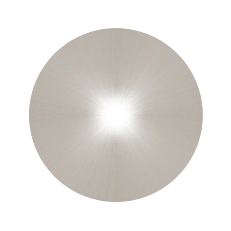

In [166]:
plt.pie(x=data['bedrooms'])

In [167]:
sns.pie(x=data['bedrooms'])

AttributeError: module 'seaborn' has no attribute 'pie'

In [ ]:
plt.violinplot(data=data, y = 'price',x='waterfront')

In [ ]:
sns.violin(data=data, y = 'price',x = 'waterfront')

In [ ]:
sns.violinplot(data=data, y = 'price',x='waterfront')

In [ ]:
d=df[df['price']==df['price'].min()]

In [ ]:
d

In [ ]:
d1=df[df['price']==df['price'].max()]
d1

In [ ]:
d1['condition']

In [ ]:
df['condition'].value_counts()

#  DS

In [276]:
x=pd.read_csv('sp500_companies.csv')

In [277]:
x.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,148.03,2354875990016,1.305410e+11,0.081,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.064857
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,255.14,1915585953792,9.798300e+10,0.124,Redmond,WA,United States,221000.0,"Microsoft Corporation develops, licenses, and ...",0.052759
2,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,101.45,1311241142272,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.036114
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,100.99,1308729278464,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.036045
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,96.54,984872189952,5.154900e+10,0.147,Seattle,WA,United States,1544000.0,"Amazon.com, Inc. engages in the retail sale of...",0.027125


In [170]:
x = [[11,21,13],[14,15,16],[27,18,29]]
A = np.array(x)
print(A)

[[11 21 13]
 [14 15 16]
 [27 18 29]]


In [171]:
print (np.linalg.det(a))

-2.0000000000000004


In [173]:
print(np.var(A))

34.839506172839506


In [176]:
print(np.linalg.var(A))

AttributeError: module 'numpy.linalg' has no attribute 'var'

In [177]:
x = np.ones(shape=(3,3), dtype='int')
for i in x:
    print(i)

[1 1 1]
[1 1 1]
[1 1 1]


In [178]:
x = [4,2,1,6,3,6,8,0,5,2,1,7,0,2]
np.var(x, ddof=1)

7.016483516483515

In [179]:
A = np.array([[3,2],[4,1],[2,5]])
B = np.array([[6,11],[4,12],[2,15]])
np.cross(A,B)

array([21, 44, 20])

In [180]:
A = np.array([4,5,6])
B = np.array([1,2,3])
np.hstack((B,A))

array([1, 2, 3, 4, 5, 6])

In [181]:
A = np.array([[4],[5],[6]])
B = np.array([[1],[2],[3]])
np.column_stack((A,B))

array([[4, 1],
       [5, 2],
       [6, 3]])

In [191]:
A = np.array([1,2,3,4,5])
A.reshape((5,1))

array([[1],
       [2],
       [3],
       [4],
       [5]])

In [196]:
A = np.array([1,3,4,5,6,7,8,9,10,11])

In [197]:
A[-1:] = 12


In [198]:
A

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10, 12])

In [199]:
np.delete(A, len(A)-1)

array([ 1,  3,  4,  5,  6,  7,  8,  9, 10])

In [200]:
sample_list = [1,2,3,4,5]
sa=pd.Series(sample_list)

In [201]:
sa

0    1
1    2
2    3
3    4
4    5
dtype: int64

In [203]:
sample.index = {'A', 'B', 'C', 'D', 'E'}

In [210]:
sample

0     1
1     4
2     9
3    16
4    25
dtype: int64

In [207]:
sample.index = list('ABCDE')

In [208]:
sample

A     1
B     4
C     9
D    16
E    25
dtype: int64

In [211]:
sample.index = ('A', 'B', 'C', 'D', 'E')

In [212]:
sample

A     1
B     4
C     9
D    16
E    25
dtype: int64

In [214]:
sample.apply(lambda x: x*x)

0      1
1     16
2     81
3    256
4    625
dtype: int64

In [217]:
sample = pd.Series([1,4,9,16,25])

In [216]:
sample.apply(lambda x: x**2)

0      1
1     16
2     81
3    256
4    625
dtype: int64

In [218]:
sample**2

0      1
1     16
2     81
3    256
4    625
dtype: int64

In [219]:
sample = pd.Series([1,4,9,16,25])
sample.append(pd.Series([36]))
sample

0     1
1     4
2     9
3    16
4    25
dtype: int64

In [220]:
sample.update(36)

In [221]:
sample

0    36
1     4
2     9
3    16
4    25
dtype: int64

In [223]:
sample = pd.Series([1,4,9,16,25])
sample.append(pd.Series([36]), ignore_index=True)

0     1
1     4
2     9
3    16
4    25
5    36
dtype: int64

In [224]:
sample = pd.Series([1,4,9,16,25])
sample.add(36)

0    37
1    40
2    45
3    52
4    61
dtype: int64

In [232]:
sample = pd.Series([1,4,9,16,25,46])

In [227]:
sample.pop(sample[-1:])

KeyError: "None of [Int64Index([46], dtype='int64')] are in the [index]"

In [228]:
sample.pop(sample.index(46))

TypeError: 'RangeIndex' object is not callable

In [229]:
sample.pop(sample[:-1])

KeyError: "Passing list-likes to .loc or [] with any missing labels is no longer supported. The following labels were missing: Int64Index([9, 16, 25], dtype='int64'). See https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike"

In [234]:
sample.pop(len(sample) - 1)

46

In [235]:
sample

0     1
1     4
2     9
3    16
4    25
dtype: int64

In [243]:
x = {"A":[1,4,9,16,25], "B":[2,6,11,18,27]}

In [244]:
x

{'A': [1, 4, 9, 16, 25], 'B': [2, 6, 11, 18, 27]}

In [239]:
pd.DataFrame(x)

,A,B
0,1,2
1,4,6
2,9,11
3,16,18
4,25,27


In [242]:
pd.DataFrame(x, columns=x.keys(), index=None)

,A,B
0,1,2
1,4,6
2,9,11
3,16,18
4,25,27


In [245]:
pd.DataFrame(x, columns=x.keys())

,A,B
0,1,2
1,4,6
2,9,11
3,16,18
4,25,27


In [246]:
data = {
    "A": ["TeamA", "TeamB", "TeamB", "TeamC", "TeamA"],
    "B": [50, 40, 40, 30, 50],
    "C": [True, False, False, False, True]
}
  
df = pd.DataFrame(data)

In [247]:
df

,A,B,C
0,TeamA,50,True
1,TeamB,40,False
2,TeamB,40,False
3,TeamC,30,False
4,TeamA,50,True


In [252]:
df.drop_duplicated()

AttributeError: 'DataFrame' object has no attribute 'drop_duplicated'

In [253]:
df

,A,B,C
0,TeamA,50,True
1,TeamB,40,False
2,TeamB,40,False
3,TeamC,30,False
4,TeamA,50,True


In [257]:
df.drop(df[df.duplicated()], axis=0)

KeyError: "['A' 'B' 'C'] not found in axis"

In [255]:
df

,A,B,C
0,TeamA,50,True
1,TeamB,40,False
2,TeamB,40,False
3,TeamC,30,False
4,TeamA,50,True


In [256]:
df.drop(df.duplicated(), axis=1)

KeyError: '[False False True False True] not found in axis'

In [258]:
df.drop_duplicates()

,A,B,C
0,TeamA,50,True
1,TeamB,40,False
3,TeamC,30,False


In [259]:
df.loc[len(df.index)] = {'A':7, 'B':8, 'C':9}

In [260]:
df

,A,B,C
0,TeamA,50,1
1,TeamB,40,0
2,TeamB,40,0
3,TeamC,30,0
4,TeamA,50,1
5,7,8,9


In [261]:
df.append(pd.DataFrame([7,8,9]), ignore_index=True)

,A,B,C,0
0,TeamA,50.0,1.0,NaN
1,TeamB,40.0,0.0,NaN
2,TeamB,40.0,0.0,NaN
3,TeamC,30.0,0.0,NaN
4,TeamA,50.0,1.0,NaN
5,7,8.0,9.0,NaN
6,NaN,NaN,NaN,7.0
7,NaN,NaN,NaN,8.0
8,NaN,NaN,NaN,9.0


In [262]:
pd.concat([df, pd.DataFrame[7,8,9]], ignore_index=True)

TypeError: 'type' object is not subscriptable

In [263]:
df[3] = [7,8,9]

ValueError: Length of values (3) does not match length of index (6)

In [264]:
df = pd.DataFrame({'A':[1,4,9], 'B':[2,5,10], 'C':[3,6,11]})

In [265]:
df

,A,B,C
0,1,2,3
1,4,5,6
2,9,10,11


In [266]:
df.cumsum(axis=1)

#df.add(axis=1)
#df.sum(axis=0)

,A,B,C
0,1,3,6
1,4,9,15
2,9,19,30


In [267]:
df

,A,B,C
0,1,2,3
1,4,5,6
2,9,10,11


In [268]:
df.cumsum()

,A,B,C
0,1,2,3
1,5,7,9
2,14,17,20


In [269]:
df

,A,B,C
0,1,2,3
1,4,5,6
2,9,10,11


In [270]:
df.add(axis=1)

TypeError: f() missing 1 required positional argument: 'other'

In [271]:
df.sum(axis=0)

A    14
B    17
C    20
dtype: int64

In [272]:
df

,A,B,C
0,1,2,3
1,4,5,6
2,9,10,11


In [273]:
df.apply(np.square)


,A,B,C
0,1,4,9
1,16,25,36
2,81,100,121


In [278]:
x.head()

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,148.03,2354875990016,1.305410e+11,0.081,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.064857
1,NMS,MSFT,Microsoft Corporation,Microsoft Corporation,Technology,Software—Infrastructure,255.14,1915585953792,9.798300e+10,0.124,Redmond,WA,United States,221000.0,"Microsoft Corporation develops, licenses, and ...",0.052759
2,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,101.45,1311241142272,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.036114
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,100.99,1308729278464,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.036045
4,NMS,AMZN,"Amazon.com, Inc.","Amazon.com, Inc.",Consumer Cyclical,Internet Retail,96.54,984872189952,5.154900e+10,0.147,Seattle,WA,United States,1544000.0,"Amazon.com, Inc. engages in the retail sale of...",0.027125


In [283]:
x.isna().sum()

Exchange                0
Symbol                  0
Shortname               0
Longname                0
Sector                  0
Industry                0
Currentprice            0
Marketcap               0
Ebitda                 42
Revenuegrowth          12
City                    0
State                  20
Country                 0
Fulltimeemployees       5
Longbusinesssummary     0
Weight                  0
dtype: int64

In [284]:
len(x['Sector'])

495

In [285]:
x[x['Marketcap']==x['Marketcap'].max()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,148.03,2354875990016,1.305410e+11,0.081,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.064857


In [286]:
x[x['Currentprice']==x['Currentprice'].max()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
375,NYQ,NVR,"NVR, Inc.","NVR, Inc.",Consumer Cyclical,Residential Construction,4639.01,16156511232,2.167959e+09,0.163,Reston,VA,United States,6600.0,"NVR, Inc. operates as a homebuilder in the Uni...",0.000445


In [287]:
x[x['Fulltimeemployees']>2000000]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
9,NYQ,WMT,Walmart Inc.,Walmart Inc.,Consumer Defensive,Discount Stores,152.42,422794788864,3.458600e+10,0.084,Bentonville,AR,United States,2300000.0,Walmart Inc. engages in the operation of retai...,0.011645


In [289]:
x['Revenuegrowth'].max()

270.791

In [290]:
x[x['Currentprice']==x['Currentprice'].max()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
375,NYQ,NVR,"NVR, Inc.","NVR, Inc.",Consumer Cyclical,Residential Construction,4639.01,16156511232,2.167959e+09,0.163,Reston,VA,United States,6600.0,"NVR, Inc. operates as a homebuilder in the Uni...",0.000445


In [292]:
i=x[x['Revenuegrowth']>0.1]

In [293]:
i[i['Currentprice']==i['Currentprice'].min()]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
420,NYQ,CCL,Carnival Corporation,Carnival Corporation & plc,Consumer Cyclical,Travel Services,9.93,12897283072,-2.586000e+09,6.886,Miami,FL,United States,40000.0,Carnival Corporation & plc operates as a leisu...,0.000355


In [300]:
k=x[x['State']=='CA']

In [301]:
k

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight
0,NMS,AAPL,Apple Inc.,Apple Inc.,Technology,Consumer Electronics,148.03,2354875990016,1.305410e+11,0.081,Cupertino,CA,United States,164000.0,"Apple Inc. designs, manufactures, and markets ...",0.064857
2,NMS,GOOG,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,101.45,1311241142272,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.036114
3,NMS,GOOGL,Alphabet Inc.,Alphabet Inc.,Communication Services,Internet Content & Information,100.99,1308729278464,9.373300e+10,0.061,Mountain View,CA,United States,186779.0,Alphabet Inc. provides various products and pl...,0.036045
10,NMS,NVDA,NVIDIA Corporation,NVIDIA Corporation,Technology,Semiconductors,169.23,421721145344,1.068000e+10,0.030,Santa Clara,CA,United States,22473.0,"NVIDIA Corporation provides graphics, and comp...",0.011615
14,NYQ,CVX,Chevron Corporation,Chevron Corporation,Energy,Oil & Gas Integrated,183.31,354455519232,5.292900e+10,0.492,San Ramon,CA,United States,42595.0,"Chevron Corporation, through its subsidiaries,...",0.009762
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
426,NYQ,BIO,"Bio-Rad Laboratories, Inc.","Bio-Rad Laboratories, Inc.",Healthcare,Medical Devices,414.71,12395267072,6.661180e+08,-0.089,Hercules,CA,United States,8200.0,"Bio-Rad Laboratories, Inc. manufactures, and d...",0.000341
437,NMS,WDC,Western Digital Corporation,Western Digital Corporation,Technology,Computer Hardware,36.75,11452145664,NaN,NaN,San Jose,CA,United States,65000.0,"Western Digital Corporation develops, manufact...",0.000315
449,NYQ,JNPR,"Juniper Networks, Inc.","Juniper Networks, Inc.",Technology,Communication Equipment,33.24,10809016320,7.243000e+08,0.190,Sunnyvale,CA,United States,10705.0,"Juniper Networks, Inc. designs, develops, and ...",0.000298
471,NYQ,RHI,Robert Half International Inc.,Robert Half International Inc.,Industrials,Staffing & Employment Services,78.78,8770577408,1.049556e+09,0.071,Menlo Park,CA,United States,14600.0,Robert Half International Inc. provides staffi...,0.000242


In [298]:
x['State'].unique()

array(['CA', 'WA', 'NE', 'MN', 'TX', 'NJ', 'AR', 'NY', 'OH', 'IN', 'GA',
       'NC', 'IL', 'MA', 'DC', nan, 'OR', 'FL', 'PA', 'RI', 'MD', 'CT',
       'MI', 'VA', 'TN', 'KY', 'WI', 'ID', 'AZ', 'MO', 'OK', 'CO', 'DE',
       'ME', 'NV', 'AL', 'IA', 'LA', 'UT'], dtype=object)

In [299]:
x['Country'].unique()

array(['United States', 'Ireland', 'United Kingdom', 'Switzerland',
       'Netherlands', 'Bermuda', 'Israel'], dtype=object)

In [302]:
k[k['Sector']==len(k['Sector'].max())]

,Exchange,Symbol,Shortname,Longname,Sector,Industry,Currentprice,Marketcap,Ebitda,Revenuegrowth,City,State,Country,Fulltimeemployees,Longbusinesssummary,Weight


In [303]:
k['Sector'].value_counts()

Technology                27
Healthcare                11
Communication Services     7
Real Estate                6
Financial Services         5
Utilities                  3
Consumer Cyclical          3
Consumer Defensive         2
Industrials                1
Energy                     1
Name: Sector, dtype: int64